In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [4]:
data = pd.read_csv('./Data/thaiGDP.csv', parse_dates = True, index_col = 0)

In [10]:
data.columns = ['GDP'] # Change column name

# reverse data from past to present 
data = data.reindex(index=data.index[::-1])

In [11]:
data.head()

,GDP
AD,
1990-01-01,39965.0
1991-01-01,45084.0
1992-01-01,50506.0
1993-01-01,55622.0
1994-01-01,62133.0


**Testing for stationarity**
First check by eye if data have trend this data set maybe contain non stationary. Best way to identify use `Dickey-Fuller Test`

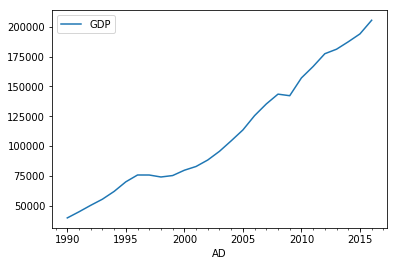

In [14]:
data.plot()

In [23]:
data.head()

,GDP
AD,
1990-01-01,39965.0
1991-01-01,45084.0
1992-01-01,50506.0
1993-01-01,55622.0
1994-01-01,62133.0


In [29]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(ts):
    print('Augment Dickey Fuller Test:')
    adftest = adfuller(ts.iloc[:,0].values, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic', 'P-Value', '#Lags', 'Number of Observation'])
    
    print('Test_Statistic: ' + str(adfoutput[0]))
    print('p-values: ' + str(adfoutput[1]))
    print('Number of observation: ' + str(adfoutput[3]))
    print('Lag order: ' + str(adfoutput[2]))

stationary_test(data)

Augment Dickey Fuller Test:
Test_Statistic: 1.89273760805757
p-values: 0.9985162449033175
Number of observation: 26.0
Lag order: 0.0


วิธีการที่พื้นฐานที่สุดที่จะอ่านผล เราสามารถดูได้จากค่า p-values ซึ่งในที่นี้มีค่าประมาณ 0.99 ซึ่งมากกว่า 0.05 ซึ่งสอดคล้องกับกราฟที่เราสังเกตุได้ด้วยตาเปล่าว่า ข้อมูลชุดนี้ ไม่เป็น Stationary

ค่า p-value = 0.99 หมายความว่า มีความเชื่อมั่นว่าข้อมูลชุดนี้จะเป็น Stationary ที่ ประมาณ 1% เท่านั้น (100 – 99) ซึ่งในการทดสอบสมมุติฐานทางสถิติโดยปกติแล้ว เราต้องการความเชื่อมั่นที่ ประมาณ 90% – 95%  นั่นคือ ค่า  p-value ที่เราอยากจะได้เพื่อยืนยันความเป็น Stationary ของข้อมูล คือ ค่าที่น้อยกว่า 0.1 – 0.05 เป็นต้น

ในบทความนี้ เราได้กำหนดให้ต้องมีความเชื่อมั่น 95% ขึ้นไปเท่านั้น เราจึงจะยอมรับว่าข้อมูลนี้เป็น Stationary ดังนั้น เราจะปรับข้อมูลไปจนกว่าจะได้ค่า p-value < 0.05 เพื่อให้ข้อมูลเป็น Stationary ซึ่งจะหมายความว่า ข้อมูลนั้นพร้อมสำหรับการทำนายด้วย ARIMA แล้ว

**ทำให้ข้อมูลเป็น Stationary **

ดังที่กล่าวไว้ในในบทความที่แล้ว ความเป็นไม่เป็น Stationary ของข้อมูล time seriesโดยหลักการแล้ว ขึ้นอยู่กับ 2 สิ่ง คือ Trend (แนวโน้มการเปลี่ยนแปลของข้อมูล) และ Seasonality (การเกิดแพทเทิร์นซ้ำๆ ณ ช่วงเวลาหนึ่งๆ) ดังนั้น การแก้ไขปัญหาที่สามารถทำได้ก็คือ การกำจัด  Trend และ Seasonality ออกไปจากข้อมูลนั่นเอง

การกำจัด Trend และ  Seasonality  จากข้อมูลสามารถทำได้หลายวิธี ตัวอย่างเช่น การใช้ Log, Cube root, Aggregation, Smoothing, Polynomial Fitting เป็นต้น อย่างไรก็ตาม ถ้าข้อมูลของเรานอกจากจะมีปัญหาเรื่อง Trend แล้ว ยังมีปัญหาเรื่อง Seasonality  ด้วย ปัญหานี้ก็จะซับซ้อนขึ้น ทำให้ในการกำจัด Sesonality อาจจะต้องใช้วีธีอื่นๆ ร่วมด้วย ยกตัวอย่างเช่น การทำ Decomposition เป็นต้น

**3.1 Modelling/estimating trend (taking log and differencing)**

Text(0.5,1,'Logarithm of Thailand GDP')

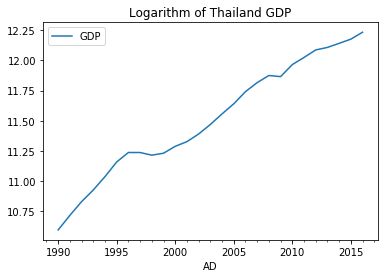

In [30]:
thGDP_log = np.log(data)
thGDP_log.plot()
plt.title('Logarithm of Thailand GDP')

Test Stationary again

In [31]:
sta_result = stationary_test(thGDP_log)

Augment Dickey Fuller Test:
Test_Statistic: -2.1851924438601316
p-values: 0.21166357260139557
Number of observation: 26.0
Lag order: 0.0


ค่า p-value = 0.21 ซึ่งมากกว่า 0.05 หมายความว่าข้อมูลยังไม่เป็น Stationary

**3.2 Removing those trends from the data (Take Differencing)**

In [40]:
thGDP_log_diff = thGDP_log - thGDP_log.shift(periods=2) # 2 day return 
thGDP_log_diff.dropna(inplace=True) # remove na at first row 

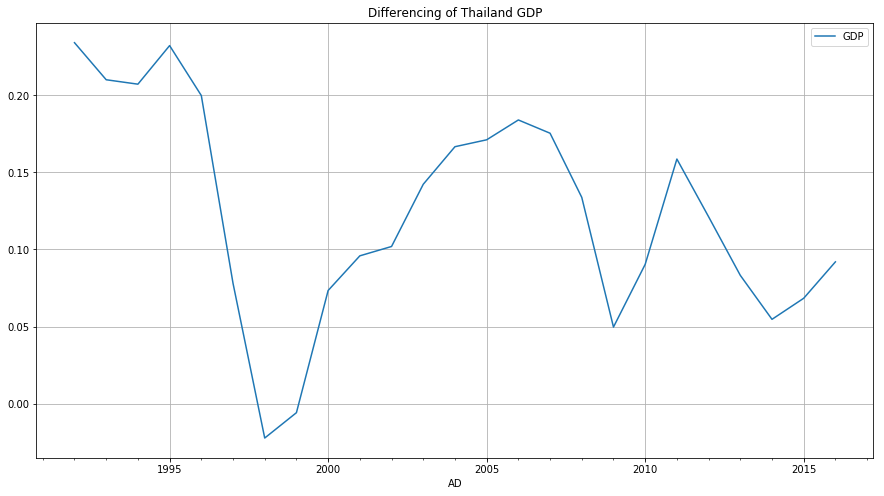

In [42]:
thGDP_log_diff.plot(figsize=(15,8))
plt.title('Differencing of Thailand GDP')
plt.grid(True)

In [41]:
stationary_test(thGDP_log_diff)

Augment Dickey Fuller Test:
Test_Statistic: -3.2439152313532693
p-values: 0.01757932275515068
Number of observation: 17.0
Lag order: 7.0


จะเห็นได้ว่าหลังทำ Differenceing ค่า p-value < 0.05 (0.017) ซึ่งหมายความว่า `ข้อมูลมีความเชื่อมั่นที่จะเป็น Stationary ที่ความมั่นใจสูงมากกว่า 95%`

**4. กำหนดตัวแปร p และ **

ขั้นตอนนี้ เราจะมาหาค่า p และ q  ที่เหมาะสมสำหรับ AR (Auto-Regressive) และ MA (Moving Average) ตามลำดับ หวังว่าคงจะยังไม่ลืมกันนะคะว่า  AR model และ MA model นี้เป็นโมเดลที่จะนำมา Integreate กันเป็น ARIMA model ในภายหลัง ซึ่งเราจะหาค่า p, q นี้โดยการพล็อตกราฟ ACF และ  PACF ค่ะ ก่อนจะเริ่มกัน มาทำความรู้จัก ACF กับ  PACF คร่าวๆ กันก่อนค่ะ

4.1)  ACF (Autocorrelation Function)
วัดความสัมพันธ์ Correlation ระหว่างข้อมูล Time series และ ข้อมูล lagged ของตัวมันเอง

4.2) PACF (Partial Autocorrelation Function
วัดความสัมพันธ์ Correlation ระหว่างข้อมูล Time series และ ข้อมูล lagged ของตัวมันเอง แต่จะไม่พิจารณาผลกระทบที่ได้พิจารณาไปแล้ว เช่น การหาค่า Correlation ของ  lag n ก็จะไม่นำค่า correlatioin ของ lag n ถึง n-1 มารวมด้วย

การหาค่า ACF และ  PACF ด้วย Python  สามารถทำได้ง่ายมากๆ เนื่องจาก  Python ได้มีการเตรียม library   ของคำสั่งไว้ให้เราเรียบร้อยแล้วใน Statsmodes library มาลอง import ไลบรารี่นี้กันค่ะ

Text(0.5,1,'PACF')

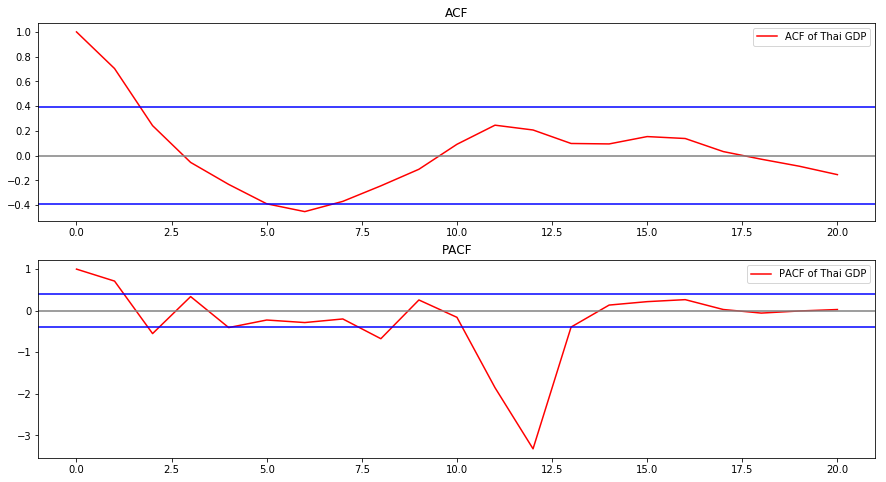

In [53]:
from statsmodels.tsa.stattools import acf, pacf

thAcf = acf(thGDP_log_diff, nlags=20)
thPacf = pacf(thGDP_log_diff, nlags=20, method='ols')

plt.figure(figsize=(15,8)) # Set figure size 

# Define subplot ACF
plt.subplot(2,1,1)
plt.plot(thAcf, color='red', label='ACF of Thai GDP')
plt.axhline(y=0, color='grey')
plt.axhline(y=-1.96/np.sqrt(len(thGDP_log_diff)), linestyle='-', color='blue')
plt.axhline(y=1.96/np.sqrt(len(thGDP_log_diff)), linestyle='-', color='blue')
plt.legend(loc='best')
plt.title('ACF')

# Define subplot PACF
plt.subplot(2,1,2)
plt.plot(thPacf, color='red', label='PACF of Thai GDP')
plt.axhline(y=0, color='grey')
plt.axhline(y=-1.96/np.sqrt(len(thGDP_log_diff)), linestyle='-', color='blue')
plt.axhline(y=1.96/np.sqrt(len(thGDP_log_diff)), linestyle='-', color='blue')
plt.legend(loc='best')
plt.title('PACF')


หนึ่งในวิธีการหาค่า p และ q สามารถทำได้โดยการหาค่า จุดตัดที่กราฟ PACF และ  ACF (กราฟเส้นสีแดง) ตัดเส้น Upper Confidence (เส้นสีน้ำเงิน) เป็นครั้งแรก ซึ่งก็คือ จุดที่วงกลมไว้ในรูปทั้งสองด้านบนนั่นเอง ในที่นี้ เราได้เขียนฟังก์ชันเพื่อหาค่าตำแหน่ง ณ จุดนั้น ดังนี้

กำหนดค่า จุดตัด ซึ่งก็คือ ค่า Lower Confidence

In [54]:
cut_point = 1.96/np.sqrt(len(thGDP_log_diff))

p, q = 0, 0
idxP, idxQ = 0, 0

for i in range(0, len(thPacf)):
    if thPacf[i] < cut_point:
        p = thPacf[i]
        idxP = i
        break

for i in range(0, len(thAcf)):
    if thAcf[i] < cut_point:
        q = thAcf[i]
        idxQ = i
        break

print('p= {}, and q= {}'.format(idxP, idxQ))

p= 2, and q= 2


## Forcast Thailand GDP phese ##

**5.1 Forcast GDP by AR model**

Set q = 0 equivalent ARIMA(2, 1, 0)

/home/boocertified/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS:0.042382')

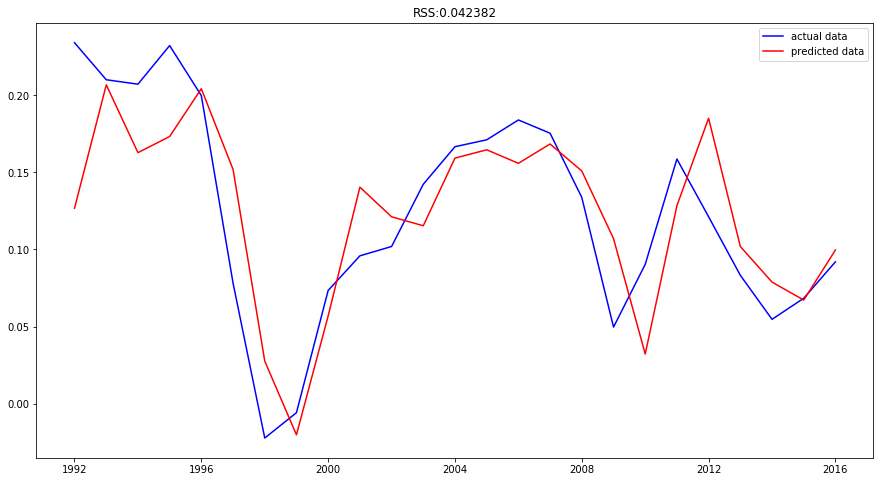

In [89]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(thGDP_log_diff, order=(idxP, 0, 0))
results_AR = model1.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(thGDP_log_diff, color='blue', label='actual data')
plt.plot(results_AR.fittedvalues, color='red', label='predicted data')
plt.legend(loc='best')
#rss = results_AR.fittedvalues - thGDP_log_diff.iloc[:,0].values
plt.title('RSS:%f'%np.sum((results_AR.fittedvalues - thGDP_log_diff.iloc[:,0].values)**2))

ค่าที่เราจะพิจารณาในที่นี้คือค่า Residual (RSS) หรือ ค่าที่ได้จากการที่เหลือจากการทำการตัด trend กับ sesonality ออกไปจากข้อมูลแล้ว ค่านี้ยิ่งน้อยยิ่งดี ในที่นี้เราได้ RSS = 0.042382  เดี๋ยวเราจะนำมันไปเปรียบเทียบกับโมเดลอื่นกันค่ะ

**5.2 Forcast GDP by MA model **

Set p = 0 equivalent ARIMA(0,1,2)


/home/boocertified/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.033365')

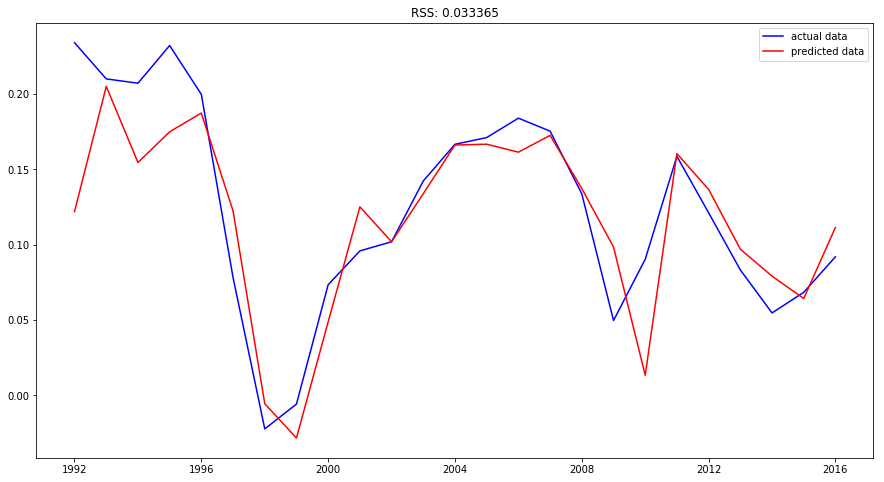

In [94]:
model2 = ARIMA(thGDP_log_diff, order=(idxP,0,idxQ))
result_ARIMA = model2.fit()
plt.figure(figsize=(15,8))
plt.plot(thGDP_log_diff, color='blue', label='actual data')
plt.plot(result_ARIMA.fittedvalues, color='red', label='predicted data')
plt.legend(loc='best')
plt.title('RSS: %f'%np.sum((result_ARIMA.fittedvalues - thGDP_log_diff.iloc[:,0].values)**2))

จะเห็นว่าค่า RSS = 0.033365 ซึ่งน้อยกว่า AR model เราก็จะเลือกโมเดล ARIMA ในการทำนาย ขั้นตอนต่อไปก็คือ แปลงค่าผลลัพธ์นี้กลับเป็นค่าจริงๆ ของข้อมูล เนื่องจากในขั้นตอนการทำนาย เราไม่ได้ทำนายจากข้อมูลดิบ จำกันได้มั้ยคะ? ก่อนทำการทำนาย เราได้ปรับข้อมูลให้เป็น stationary ก่อน ด้วยการทำ logarithm และ differencing ขึ้นตอนสุดท้ายเราจึงต้องปรับข้อมูลกลับไปใน  scale ของข้อมูลดิบ

**7. ปรับข้อมูลทำนายกลับไปสู่ Original scale ของข้อมูลดิบ **



In [169]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum() # Continue sum value verticle axis
#thGDP_log_diff
prediction_ARIMA_log = pd.Series(thGDP_log.iloc[:,0], index=thGDP_log.index)
#prediction_ARIMA_log = pd.Series(thGDP_log.iloc[0], index=thGDP_log.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA = np.exp(prediction_ARIMA_log)
prediction_ARIMA

AD
1990-01-01    3.996500e+04
1991-01-01    4.508400e+04
1992-01-01    5.705541e+04
1993-01-01    7.713668e+04
1994-01-01    1.005673e+05
1995-01-01    1.352675e+05
1996-01-01    1.764311e+05
1997-01-01    1.993406e+05
1998-01-01    1.939037e+05
1999-01-01    1.915553e+05
2000-01-01    2.129566e+05
2001-01-01    2.508480e+05
2002-01-01    2.959067e+05
2003-01-01    3.660910e+05
2004-01-01    4.718404e+05
2005-01-01    6.059658e+05
2006-01-01    7.873965e+05
2007-01-01    1.008445e+06
2008-01-01    1.227067e+06
2009-01-01    1.341473e+06
2010-01-01    1.501820e+06
2011-01-01    1.870432e+06
2012-01-01    2.281988e+06
2013-01-01    2.567871e+06
2014-01-01    2.874280e+06
2015-01-01    3.173327e+06
2016-01-01    3.756190e+06
dtype: float64

จากคำสั่งด้านบน เราได้ทำการหาค่า cummulative sum ของ ค่าที่ทำนายได้จาก  ARIMA ซึ่งถือเป็นค่าที่ ARIMA ทำนายว่าค่าของข้อมูลแต่ละจุดจะเปลี่ยนแปลงไปแค่ไหน ต่อมาเราก็จะนำค่านั้นมาบวกเข้ากับข้อมูลดิบ (จะเป็นการทำค่าการเปลี่ยนแปลงที่ทำนายได้ ไปปรับกับข้อมูลจริงๆ) และ เก็บไว้ในตัวแปร prediction_ARIMA มาลองพล็อตกราฟเปรียบเทียบค่าจริงกับค่าที่ได้จากการทำนายด้วย ARIMA

In [171]:
data

,GDP
AD,
1990-01-01,39965.0
1991-01-01,45084.0
1992-01-01,50506.0
1993-01-01,55622.0
1994-01-01,62133.0
1995-01-01,70160.0
1996-01-01,75875.0
1997-01-01,75856.0
1998-01-01,74202.0


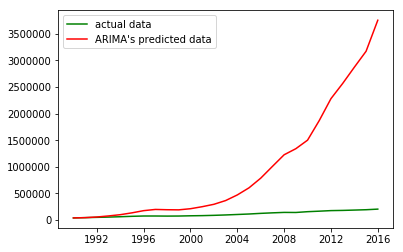

In [170]:
plt.plot(data, color='green', label='actual data')
plt.plot(prediction_ARIMA, color='red', label='ARIMA\'s predicted data')
plt.legend(loc='best')
#plt.plot(prediction_ARIMA, color='green', label='actual data')